In [1]:
import os
import mujoco
import numpy
import mediapy as media
import matplotlib.pyplot as plt
import ffmpeg
import math

In [2]:
width= 800
height = 600

In [3]:
xml_template = '''
<mujoco>
    <visual><global offwidth = "{width}" offheight="{height}"/></visual>
    <option gravity = "0 0 -9.81"><flag gravity = "disable" /></option>
    <option timestep = "0.001" />
    <option><flag contact = "enable"/> </option>
    <compiler angle = "degree" />
    <worldbody>
        <light name="light1" pos="0 0 1"/>
        <body name  = "A" pos = "0.05 0 .5" axisangle = "0 1 0 0">
            <joint name = "j1" type = "hinge" axis = "0 1 0" pos = "0 0 0" stiffness = "10" damping = "1" />
            <geom type = "box" size = "1.25 .05 .05" pos = "1.25 0 0" rgba="1 0 0 1" mass = "1" />
            <inertial mass = "1" diaginertia="1 1 1" pos =".5 0 0" />
             <body name  = "B" pos = "1 0 0" axisangle = "0 1 0 0">
                <joint name = "j2" type = "hinge" axis = "0 1 0" pos = "0 0 0" stiffness = "10" damping = "1" />
                <geom type = "box" size = "2.0 .05 .05" pos = "3.4 0 0" rgba="0 1 0 1" mass = "1" />
                <inertial mass = "1" diaginertia="1 1 1" pos =".5 0 0" />
            </body>            
        </body>

        <body name  = "C" pos = "-0.05 0 .5" axisangle = "0 1 0 0">
            <joint name = "j3" type = "hinge" axis = "0 1 0" pos = "0 0 0" stiffness = "10" damping = "1" />
            <geom type = "box" size = "1.25 .05 .05" pos = "-1.25 0 0" rgba="1 0 0 1" mass = "1" />
            <inertial mass = "1" diaginertia="1 1 1" pos =".5 0 0" />
             <body name  = "D" pos = "-1 0 0" axisangle = "0 1 0 0">
                <joint name = "j4" type = "hinge" axis = "0 1 0" pos = "0 0 0" stiffness = "10" damping = "1" />
                <geom type = "box" size = "2 .05 .05" pos = "-3.4 0 0" rgba="0 1 0 1" mass = "1" />
                <inertial mass = "1" diaginertia="1 1 1" pos =".5 0 0" />
            </body>            
        </body>

        <body name  = "E" pos = "0 0 0.1" axisangle = "0 1 0 0">
            <joint name = "j5" type = "hinge" axis = "0 1 0" pos = "0 0 0" stiffness = "10" damping = "1" />
            <geom type = "box" size = ".05 .05 3" pos = "0 0 3" rgba="1 0 0 1" mass = "1" />
            <inertial mass = "1" diaginertia="1 1 1" pos ="0 0 0" />
        </body>


        
        <!--<body name = "floor" pos ="0 0 0">
        <geom pos="0 0 0" size = "5 5 0.05" type = "plane" rgba = "0 0 1 1" />
        </body> -->
        <camera name="custom_view" pos="0 -1 0.5" euler="0.5 0 0"/>

    </worldbody>
    <actuator><position name ="motor1" joint="j1" kp="100"/></actuator>
    <actuator><position name ="motor2" joint="j3" kp="-100"/></actuator>
</mujoco>
'''

In [4]:
#del renderer
xml = xml_template.format(width=width, height=height)
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)
renderer = mujoco.Renderer(model,width=width,height=height)

In [5]:
A = 2
d = 0
ts = 0.25
f = 0.5
l = 0.5

def mycontroller(model, data):
    t = data.time
    pos = A*math.sin(2*math.pi*f*t - 2*math.pi*l)
    data.ctrl = [pos]
    pos1 = -A*math.sin(2*math.pi*f*t - 2*math.pi*l)
    data.ctrl = [pos1]
    return 

In [6]:

import math
mujoco.mj_resetData(model,data)
data.qpos[0] = 0*math.pi/180 
data.qvel[0] = 0

In [7]:
#data.qpos[0] = 
duration = 10
framerate = 30
frames = []
mujoco.set_mjcb_control(mycontroller)
last_time=data.time
while data.time<duration:
    #if data.time == last_time:
        #print(data.time)
    mujoco.mj_step(model,data)
    if len(frames)<data.time*framerate:
        renderer.update_scene(data)
        pixels = renderer.render()
        frames.append(pixels)
    last_time=data.time



(np.float64(-0.5), np.float64(799.5), np.float64(599.5), np.float64(-0.5))

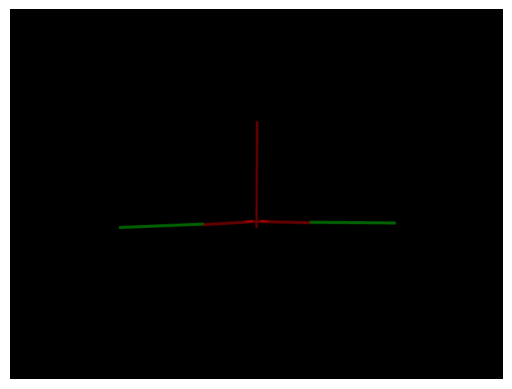

In [8]:
plt.imshow(frames[15])
plt.axis('off')

""

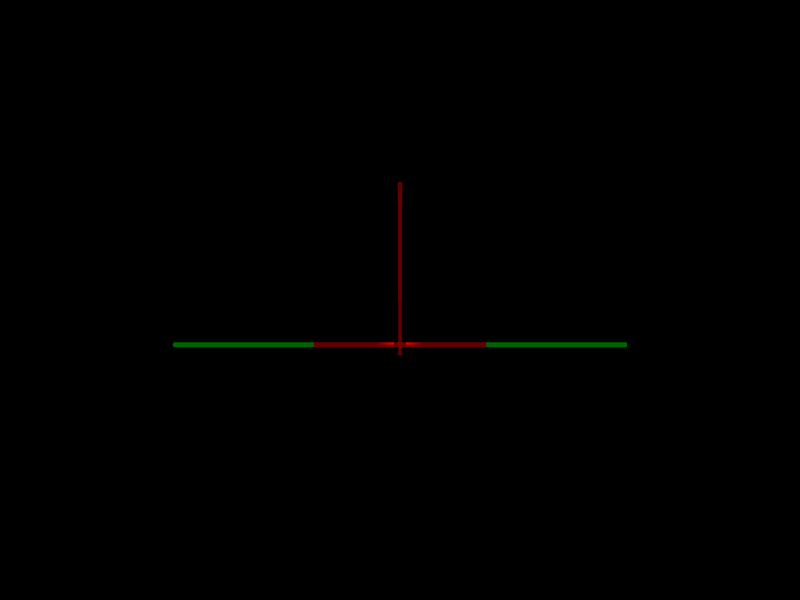

In [9]:
media.show_video(frames, fps=framerate, codec='gif',width=width, height = height)

In [ ]:
media.write_video('pendulum.gif',frames, fps=framerate, codec='gif')